# Raichle1983Model for Image-Derived Input Functions and wmparc-wmparc

## Setup

In [1]:
# system functions that are always useful to have
import time, sys, os

# basic numeric setup
import numpy as np

from Raichle1983ModelAndArtery import Raichle1983ModelAndArtery

In [2]:
singularity = "/Volumes/PrecunealSSD/Singularity"
niis = [
os.path.join(singularity, 
    "CCIR_01211", "derivatives", "sub-108293", "ses-20210421144815", "pet", 
    "sub-108293_ses-20210421144815_trc-co_proc-MipIdif_idif.nii.gz"),
os.path.join(singularity, 
    "CCIR_01211", "derivatives", "sub-108293", "ses-20210421150523", "pet", 
    "sub-108293_ses-20210421150523_trc-oo_proc-MipIdif_idif.nii.gz"),
os.path.join(singularity, 
    "CCIR_01211", "derivatives", "sub-108293", "ses-20210421152358", "pet", 
    "sub-108293_ses-20210421152358_trc-ho_proc-MipIdif_idif.nii.gz"),
os.path.join(singularity, 
    "CCIR_01211", "derivatives", "sub-108293", "ses-20210421154248", "pet", 
    "sub-108293_ses-20210421154248_trc-oo_proc-MipIdif_idif.nii.gz"),
os.path.join(singularity, 
   "CCIR_01211", "derivatives", "sub-108293", "ses-20210421155709", "pet", 
   "sub-108293_ses-20210421155709_trc-fdg_proc-MipIdif_idif.nii.gz"),
os.path.join(singularity, 
    "CCIR_01211", "derivatives", "sub-108237", "ses-20221031100910", "pet", 
    "sub-108237_ses-20221031100910_trc-co_proc-MipIdif_idif.nii.gz"),
os.path.join(singularity, 
    "CCIR_01211", "derivatives", "sub-108237", "ses-20221031102320", "pet", 
    "sub-108237_ses-20221031102320_trc-oo_proc-MipIdif_idif.nii.gz"),
os.path.join(singularity, 
    "CCIR_01211", "derivatives", "sub-108237", "ses-20221031103712", "pet", 
    "sub-108237_ses-20221031103712_trc-oo_proc-MipIdif_idif.nii.gz"),
os.path.join(singularity, 
    "CCIR_01211", "derivatives", "sub-108237", "ses-20221031110638", "pet", 
    "sub-108237_ses-20221031110638_trc-ho_proc-MipIdif_idif.nii.gz"),
os.path.join(singularity, 
    "CCIR_01211", "derivatives", "sub-108237", "ses-20221031113804", "pet", 
    "sub-108237_ses-20221031113804_trc-fdg_proc-MipIdif_idif.nii.gz"), 
os.path.join(singularity, 
    "CCIR_01211", "derivatives", "sub-108254", "ses-20221116095143", "pet", 
    "sub-108254_ses-20221116095143_trc-co_proc-MipIdif_idif.nii.gz"),
os.path.join(singularity, 
    "CCIR_01211", "derivatives", "sub-108254", "ses-20221116100858", "pet", 
    "sub-108254_ses-20221116100858_trc-oo_proc-MipIdif_idif.nii.gz"),
os.path.join(singularity, 
    "CCIR_01211", "derivatives", "sub-108254", "ses-20221116102328", "pet", 
    "sub-108254_ses-20221116102328_trc-oo_proc-MipIdif_idif.nii.gz"),
os.path.join(singularity, 
    "CCIR_01211", "derivatives", "sub-108254", "ses-20221116104751", "pet", 
    "sub-108254_ses-20221116104751_trc-ho_proc-MipIdif_idif.nii.gz"),
os.path.join(singularity, 
    "CCIR_01211", "derivatives", "sub-108254", "ses-20221116115244", "pet", 
    "sub-108254_ses-20221116115244_trc-fdg_proc-MipIdif_idif.nii.gz"),
os.path.join(singularity, 
    "CCIR_01211", "derivatives", "sub-108250", "ses-20221207093856", "pet", 
    "sub-108250_ses-20221207093856_trc-co_proc-MipIdif_idif.nii.gz"),
os.path.join(singularity, 
    "CCIR_01211", "derivatives", "sub-108250", "ses-20221207095507", "pet", 
    "sub-108250_ses-20221207095507_trc-oo_proc-MipIdif_idif.nii.gz"),
os.path.join(singularity, 
    "CCIR_01211", "derivatives", "sub-108250", "ses-20221207100946", "pet", 
    "sub-108250_ses-20221207100946_trc-oo_proc-MipIdif_idif.nii.gz"),
os.path.join(singularity, 
    "CCIR_01211", "derivatives", "sub-108250", "ses-20221207102944", "pet", 
    "sub-108250_ses-20221207102944_trc-ho_proc-MipIdif_idif.nii.gz"),
os.path.join(singularity, 
    "CCIR_01211", "derivatives", "sub-108250", "ses-20221207104909", "pet", 
    "sub-108250_ses-20221207104909_trc-fdg_proc-MipIdif_idif.nii.gz"), 
os.path.join(singularity, 
    "CCIR_01211", "derivatives", "sub-108284", "ses-20230220093702", "pet", 
    "sub-108284_ses-20230220093702_trc-co_proc-MipIdif_idif.nii.gz"),
os.path.join(singularity, 
    "CCIR_01211", "derivatives", "sub-108284", "ses-20230220095210", "pet", 
    "sub-108284_ses-20230220095210_trc-oo_proc-MipIdif_idif.nii.gz"),
os.path.join(singularity, 
    "CCIR_01211", "derivatives", "sub-108284", "ses-20230220101103", "pet", 
    "sub-108284_ses-20230220101103_trc-oo_proc-MipIdif_idif.nii.gz"),
os.path.join(singularity, 
    "CCIR_01211", "derivatives", "sub-108284", "ses-20230220103226", "pet", 
    "sub-108284_ses-20230220103226_trc-ho_proc-MipIdif_idif.nii.gz"),
os.path.join(singularity, 
    "CCIR_01211", "derivatives", "sub-108284", "ses-20230220112328", "pet", 
    "sub-108284_ses-20230220112328_trc-ho_proc-MipIdif_idif.nii.gz"),
os.path.join(singularity, 
    "CCIR_01211", "derivatives", "sub-108306", "ses-20230227103048", "pet", 
    "sub-108306_ses-20230227103048_trc-co_proc-MipIdif_idif.nii.gz"),
os.path.join(singularity, 
    "CCIR_01211", "derivatives", "sub-108306", "ses-20230227104631", "pet", 
    "sub-108306_ses-20230227104631_trc-oo_proc-MipIdif_idif.nii.gz"),
os.path.join(singularity, 
    "CCIR_01211", "derivatives", "sub-108306", "ses-20230227112148", "pet", 
    "sub-108306_ses-20230227112148_trc-oo_proc-MipIdif_idif.nii.gz"),
os.path.join(singularity, 
    "CCIR_01211", "derivatives", "sub-108306", "ses-20230227113853", "pet", 
    "sub-108306_ses-20230227113853_trc-ho_proc-MipIdif_idif.nii.gz"),
os.path.join(singularity, 
    "CCIR_01211", "derivatives", "sub-108306", "ses-20230227115809", "pet", 
    "sub-108306_ses-20230227115809_trc-fdg_proc-MipIdif_idif.nii.gz")]

In [3]:
# define model
input_function = os.path.join(singularity, 
    "CCIR_01211", "derivatives", "sub-108293", "ses-20210421152358", "pet", 
    "sub-108293_ses-20210421152358_trc-ho_proc-MipIdif_idif.nii.gz"),
pet_measurement = os.path.join(singularity, 
    "CCIR_01211", "derivatives", "sub-108293", "ses-20210421152358", "pet", 
    "sub-108293_ses-20210421152358_trc-ho_proc-BrainMoCo2-createNiftiMovingAvgFrames-ParcWmparc-reshape-to-wmparc-wmparc.nii.gz"),
rm = Raichle1983ModelAndArtery(input_function[0], pet_measurement[0], nlive=1000) # 1000

Boxcar: found data for tracer ho
raichlef1 not found in TCModelAndArtery.pet_measurement


In [4]:
print(rm.truths)

[8.95, 2.34, 6.05, 4.43, 4.23, 4.24, -2.0, -0.36, 8.69, 0.49, 0.19, 0.084, 2.56, 0.001, 0.012, 1.192, 0.02, 8.311, 0.027]


KeyboardInterrupt: 

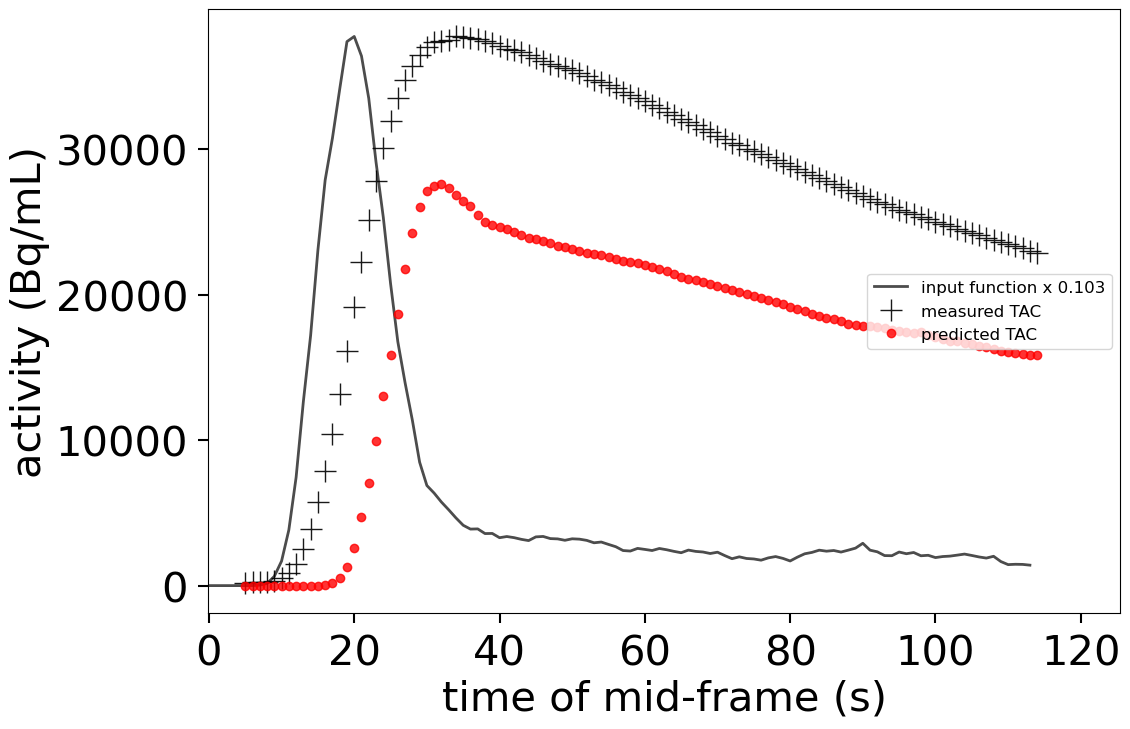

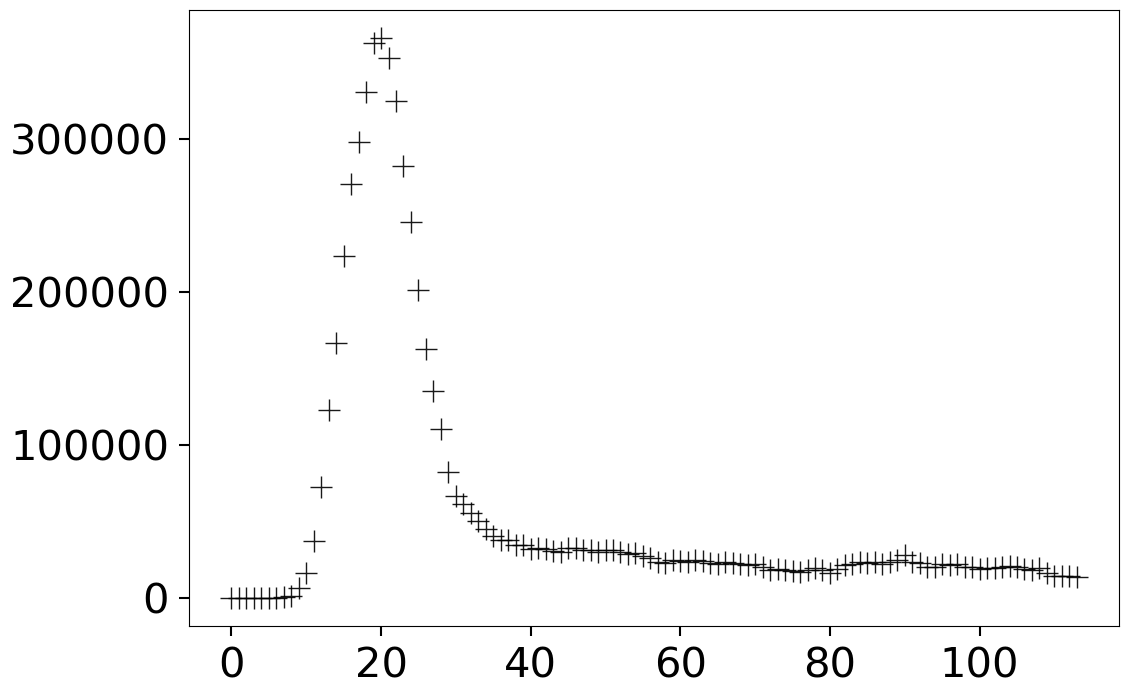

In [6]:
rm.plot_truths()

In [ ]:
rm.plot_variations(tindex=0, tmin=0.0001, tmax=0.02)

Let's sample from this distribution using the default `dynesty` settings with `'slice'`.

In [ ]:
# de novo
res_dict = rm.run_nested()
rm.save_results(res_dict)

# restart
# sampler = dynesty.DynamicNestedSampler.restore(rm.fqfp+"_dynesty-Boxcar-20240122210738.save")
# sampler.run_nested(resume=True)
# res = sampler.results

In [ ]:
rm.plot_results(res_dict)

# Misc. Testing

In [ ]:
from pympler import asizeof
res = res_dict["res"]
asizeof.asizeof(res)

In [ ]:
res.asdict()

In [ ]:
rd = res.asdict()
rd

In [ ]:
rd["logz"][-1]

In [ ]:
rd["information"][-1]

In [ ]:
res.summary()

In [ ]:
import nibabel as nib
import matplotlib.pyplot as plt

fqfn = os.path.join(singularity, 
    "CCIR_01211", "derivatives", "sub-108293", "ses-20210421152358", "pet", 
    "sub-108293_ses-20210421152358_trc-ho_proc-BrainMoCo2-createNiftiMovingAvgFrames-ParcWmparc-reshape-to-wmparc-wmparc.nii.gz")
nii = nib.load(fqfn)
img = nii.get_fdata()
plt.imshow(img, cmap="gray", origin="lower")

plt.figure(figsize=(12, 8))
plt.plot(img[0,], linewidth=2)